In [1]:
#Código para el TFM de Víctor Gabaldón Moreno (vicgabal@ucm.es) sobre Análisis de la contaminación lumínica en Madrid usando imagenes desde el espacio
#Este código detecta todas las fuentes puntuales o hotspots de todas las imágenes fits, estudiando y sustrayendo el fondo y luego aplicando photutils.

In [ ]:
import pandas as pd
from astropy.io import ascii
import photutils
import astropy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as f
import astropy.io.fits as fits
from math import pi
import pandas
import scipy
from scipy import stats
from scipy.optimize import curve_fit
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import lmfit as lm
from photutils import detect_threshold
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils import detect_sources
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import os,sys,glob
import matplotlib as mpl
from matplotlib.pyplot import figure, show, rc, grid, savefig
from matplotlib.ticker import MultipleLocator
import numpy as np
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from astropy.stats import sigma_clipped_stats
from astropy.stats import SigmaClip
from photutils import Background2D, MedianBackground
from astropy.stats import sigma_clipped_stats
from photutils import datasets
from photutils import DAOStarFinder
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
from astropy.wcs import WCS

dpi=250
plt.rcParams['figure.dpi']= dpi

#%matplotlib qt

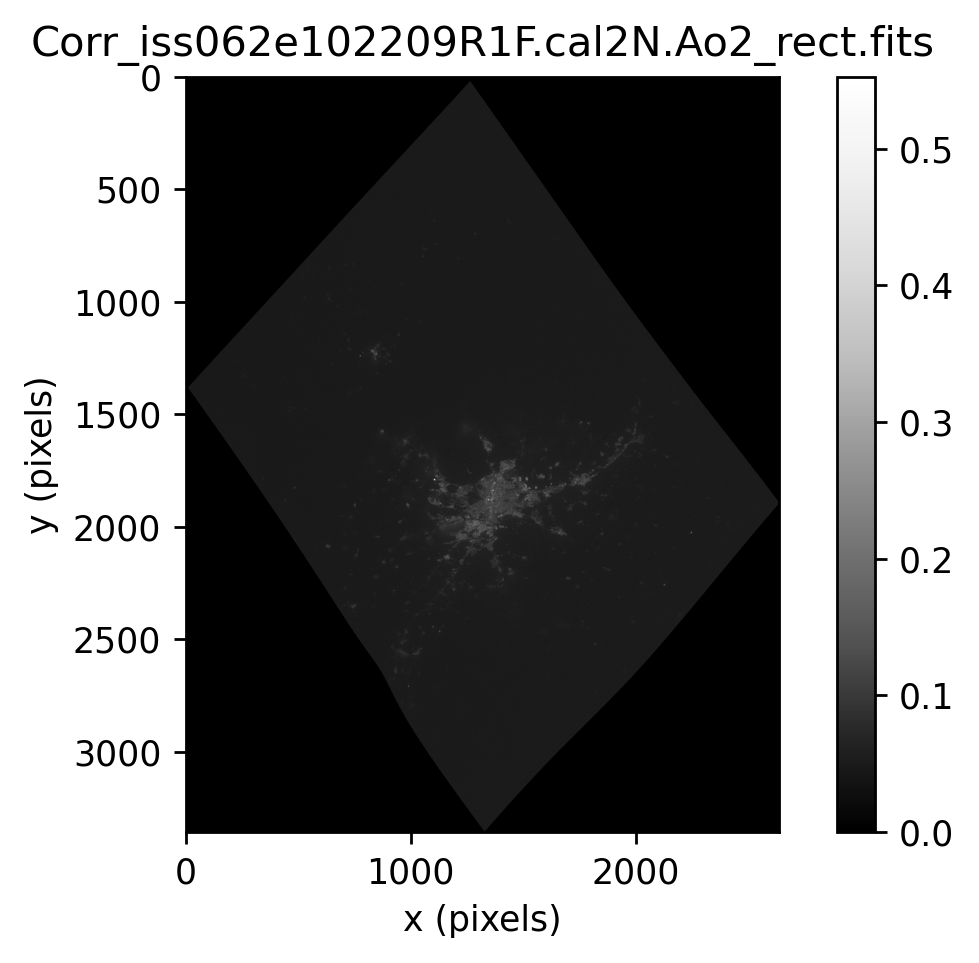

0.05151362755865831
0.001836860823958939


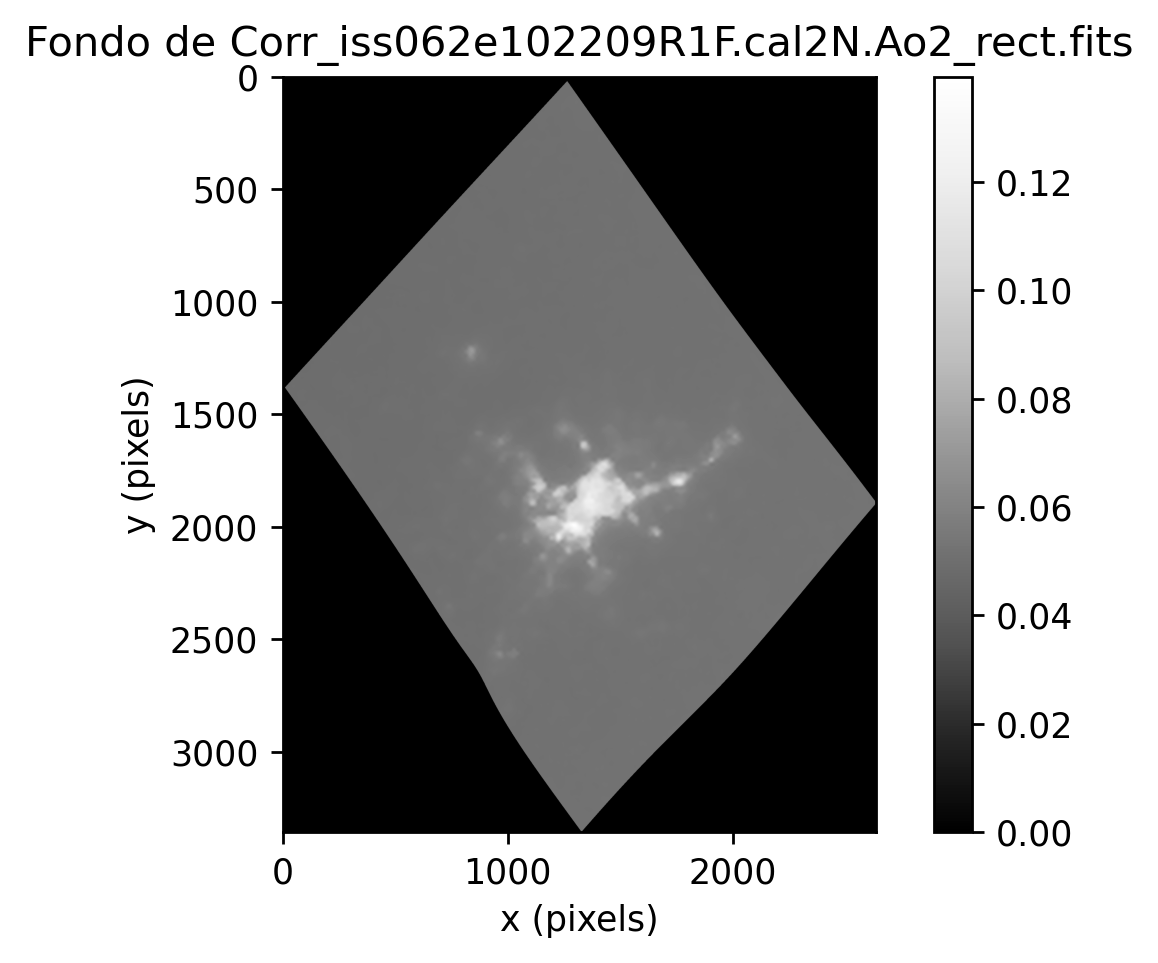

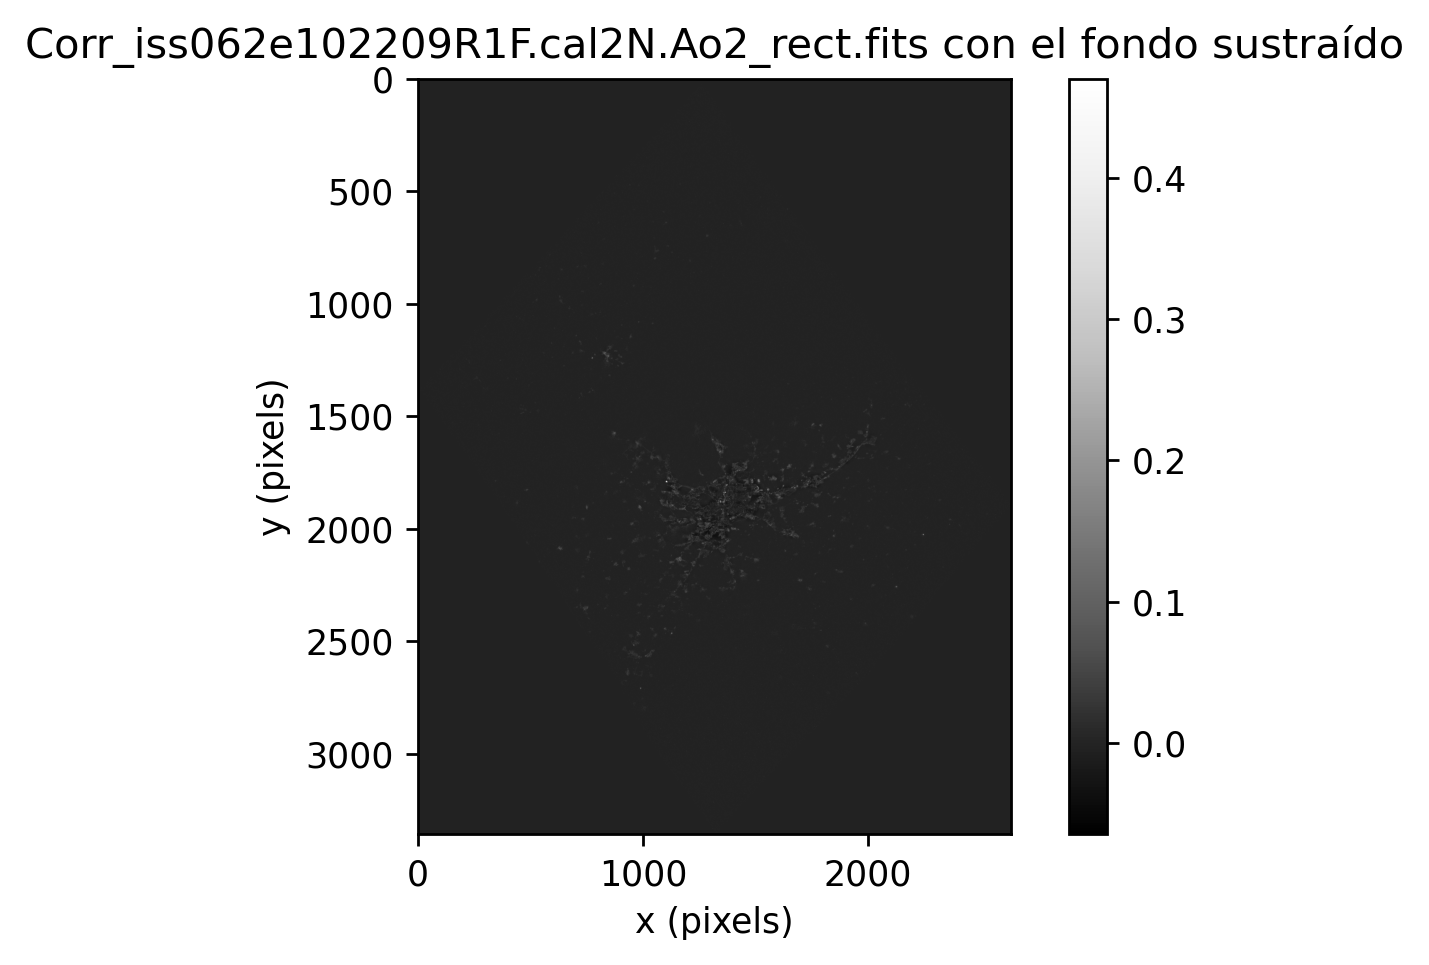

(1.4475675904937615e-05, 0.0, 0.0014207143566355622)
 id xcentroid ycentroid sharpness  ... sky     peak       flux        mag     
--- --------- --------- ---------- ... --- ----------- --------- -------------
  1 978.29529 1078.9586  0.7805004 ...   0 0.085810565 1.3318014   -0.31109868
  2 829.20007 1216.4657 0.48155848 ...   0  0.12547704 1.7212529   -0.58961171
  3 826.24331 1219.2638 0.75321675 ...   0  0.12646677 1.2213524   -0.21710252
  4  784.4491 1223.9314 0.47926597 ...   0 0.058439567 1.0650921  -0.068467874
  5 844.65941 1230.6694 0.50167955 ...   0  0.12141901 1.4544121    -0.4067187
  6 772.76639 1239.2668 0.48018558 ...   0   0.1894596 3.7269316    -1.4283785
  7 2012.8662 1449.3784 0.55778613 ...   0 0.081234786 1.4038179   -0.36827692
  8 1785.1273 1538.0036 0.34510411 ...   0 0.077810108 1.1203386   -0.12337324
  9 1991.1489 1567.7299 0.43542295 ...   0  0.06945067 1.0039852 -0.0043183129
 10 871.65971 1573.1456  0.4102219 ...   0 0.098223757 1.0709969  -0.074470543

ValueError: Specified a delimiter with both sep and delim_whitespace=True; you can only specify one.

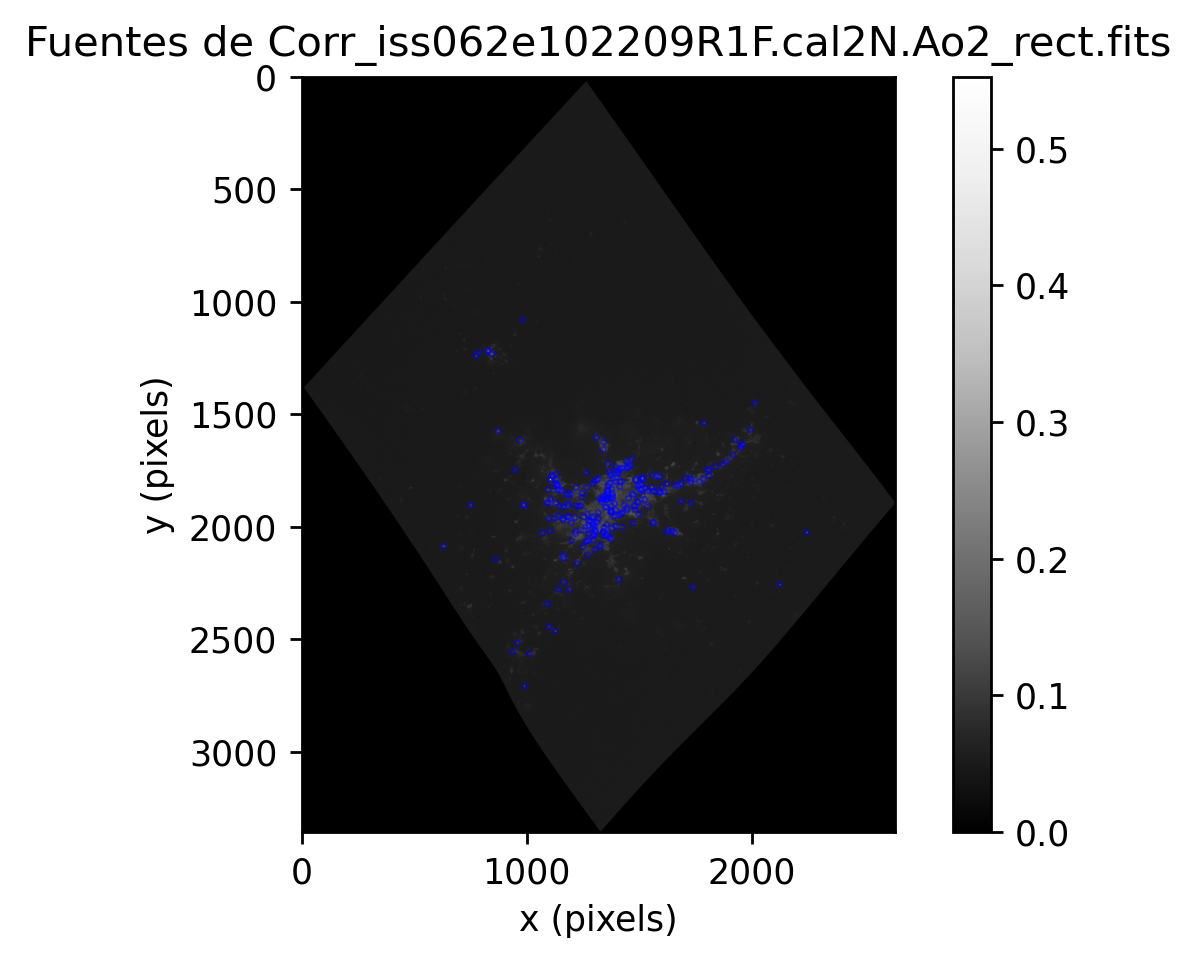

In [3]:
# # TEST DE SUSTRACIÓN DE FONDO Y FUENTES PUNTUALES PARA 1 IMAGEN:


# img = fits.open('C:\\Users\\Victor\\Dropbox\\2019-2020 Master Astro\\TFM\\Imagenes georeferenciadas\\Puntos de interés\\Ficheros_fits_test\\Corr_iss062e102209R1F.cal2N.Ao2_rect.fits')
# data = img[0].data

# plt.imshow(data,cmap='Greys_r')
# plt.title('Corr_iss062e102209R1F.cal2N.Ao2_rect.fits')
# plt.colorbar()
# plt.xlabel('x (pixels)')
# plt.ylabel('y (pixels)')
# plt.show()

# # ANALISIS DEL FONDO para 1 imagen#######################################################################################

# sigma_clip = SigmaClip(sigma=4)#(2.0 antes) number of standard deviations (per pixel) above the background
# bkg_estimator = MedianBackground()
# mask = (data == 0)
# bkg = Background2D(data, (15, 15), filter_size=(3, 3), mask=mask)
# print(bkg.background_median)  
# print(bkg.background_rms_median) 
# fondo = bkg.background * ~mask

# plt.imshow(fondo, cmap='Greys_r') 
# plt.title('Fondo de Corr_iss062e102209R1F.cal2N.Ao2_rect.fits')
# plt.colorbar()
# plt.xlabel('x (pixels)')
# plt.ylabel('y (pixels)')
# plt.show()

# imagen_sin_fondo=data-fondo
# plt.imshow(imagen_sin_fondo,cmap='Greys_r')
# plt.title('Corr_iss062e102209R1F.cal2N.Ao2_rect.fits con el fondo sustraído')
# plt.colorbar()
# plt.xlabel('x (pixels)')
# plt.ylabel('y (pixels)')
# plt.show()
# plt.imsave('prueba.tiff', imagen_sin_fondo, cmap='Greys_r')

# # IDENTIFICACIÓN DE LAS FUENTES PUNTUALES#################################################################################

# mean, median, std = sigma_clipped_stats(imagen_sin_fondo, sigma=5)
# print((mean, median, std))

# daofind = DAOStarFinder(fwhm=6, threshold=60.*std)  #FWHM anchura a media altura. Más grande= fuente de luz cae más suave. Threshold=20 para Blue (389), 60 para G2F (459), 60 para G3F (486), 46 para R1F (489)
# sources = daofind(imagen_sin_fondo - median)  
# for col in sources.colnames:  
#     sources[col].info.format = '%.8g'  # for consistent table output
# print(sources)  

# positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
# apertures = CircularAperture(positions, r=4.)
# plt.imshow(data, cmap='Greys_r')
# apertures.plot(color='blue', lw=1.5, alpha=0.5)
# plt.colorbar()
# plt.xlabel('x (pixels)')
# plt.ylabel('y (pixels)')
# plt.title('Fuentes de Corr_iss062e102209R1F.cal2N.Ao2_rect.fits')

# #GUARDADO DEL ARCHIVO .csv con la tabla de fuentes:

# ascii.write(sources, str('prueba')+'.dat', overwrite=True)

# #Añadido de coordenadas de lon y lat:

# tabla=pd.read_table('prueba.dat', delim_whitespace=True)
# tabla

# #LEER LAS COORDENADAS Y CONVERTIRLAS A GRADOS CENTESIMALES

# xcentroid=tabla['xcentroid'] #LEER las x
# ycentroid=tabla['ycentroid'] #Leer las y

# directory_load='C:\\Users\\Victor\\Dropbox\\2019-2020 Master Astro\\TFM\\Imagenes georeferenciadas\\Puntos de interés\\Ficheros_fits_test\\'
# wcosa = WCS(directory_load+'Corr_iss062e102209R1F.cal2N.Ao2_rect.fits')  
# lon, lat = wcosa.all_pix2world(xcentroid, ycentroid, 0)
# lon=lon-360

# tabla['lon'] = lon  #AÑADIR LA COLUMNA x CONVERTIDA A LA TABLA
# tabla['lat'] = lat #AÑADIR LA COLUMNA y CONVERTIDA A LA TABLA
# print(tabla)

# tabla.to_csv('.\Fuentes_puntuales\\prueba.dat',sep=" ")

In [5]:
#ALGORITMO DE DETECCION DE FUENTES PUNTUALES:

directory_load = '.\Ficheros_fits_test\\'
files = [i for i in os.listdir(".\Ficheros_fits_test\\")]

for index, file in enumerate(files):
    img = fits.open(directory_load+file)
    data = img[0].data
    
    sigma_clip = SigmaClip(sigma=4)#(2.0 antes) number of standard deviations (per pixel) above the background
    bkg_estimator = MedianBackground()
    mask = (data == 0)
    bkg = Background2D(data, (15, 15), filter_size=(3, 3), mask=mask)
    fondo = bkg.background * ~mask
    imagen_sin_fondo=data-fondo


    #IDENTIFICACIÓN DE LAS FUENTES PUNTUALES PARA N IMAGENES#################################################################################

    mean, median, std = sigma_clipped_stats(imagen_sin_fondo, sigma=5)    
    daofind = DAOStarFinder(fwhm=6, threshold=60.*std)  #FWHM anchura a media altura. Más grande= fuente de luz cae más suave
    sources = daofind(imagen_sin_fondo - median)  
    
    try:
        
        for col in sources.colnames:  
            sources[col].info.format = '%.8g'  # for consistent table output

        positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
        apertures = CircularAperture(positions, r=4.)

        #GUARDADO DEL ARCHIVO .csv con la tabla de fuentes:

        ascii.write(sources, str(file)+'.dat', overwrite=True)
    
        #Añadido de coordenadas de lon y lat:

        tabla=pd.read_table(str(file)+'.dat', sep=' ')

        #LEER LAS COORDENADAS Y CONVERTIRLAS A GRADOS CENTESIMALES

        xcentroid=tabla['xcentroid'] #LEER las x
        ycentroid=tabla['ycentroid'] #Leer las y

        wcosa = WCS(directory_load+file)
        lon, lat = wcosa.all_pix2world(xcentroid, ycentroid, 0)
        lon=lon-360

        tabla['lon'] = lon  #AÑADIR LA COLUMNA x CONVERTIDA A LA TABLA
        tabla['lat'] = lat #AÑADIR LA COLUMNA y CONVERTIDA A LA TABLA

        tabla.to_csv('.\Fuentes_puntuales\\'+str(file)+'.csv',sep=";",index=False)
        print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero '+str(file)+'.csv')
    
        borrar=os.listdir("C:\\Users\\Victor\\Dropbox\\2019-2020 Master Astro\\TFM\\Imagenes georeferenciadas\\Puntos de interés")

        for item in borrar:
            if item.endswith(".dat"):
                os.remove(item)
    
        
    except AttributeError:
        pass

>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss030e082052B4F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss030e082052G2F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss030e082052G3F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss030e082052R1F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss030e209274B4F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss030e209274G2F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss030e209274G3F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss030e209274R1F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss030e209462B4F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss030e209462G2F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss030e209462G3F.cal2N.Ao2_re

>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss034e005868B4F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss034e005868G2F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss034e005868G3F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss034e005868R1F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss034e005870B4F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss034e005870G2F.cal2N.Ao2_rect.fits.csv


>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss034e005870R1F.cal2N.Ao2_rect.fits.csv


>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss035e023371B4F.cal2N.Ao2_rect.fits.csv


>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss038e041064B4F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss038e041064G2F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss038e041064G3F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss038e041064R1F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss045e031928B4F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss045e031928G2F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss045e031928G3F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss045e031928R1F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss045e031934B4F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss045e031934G2F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss045e031934G3F.cal2N.Ao2_re

>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss050e041680B4F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss050e041680G2F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss050e041680G3F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss050e041680R1F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss059e001203B4F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss059e001203G2F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss059e001203G3F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss059e001203R1F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss062e102209B4F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss062e102209G2F.cal2N.Ao2_rect.fits.csv
>>>>>>>>>>>>>>>>>>>>>>>>>>>>Creado el fichero Corr_iss062e102209G3F.cal2N.Ao2_re